In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 435.7 kB/s eta 0:01:30
   ---------------------------------------- 0.1/38.8 MB 656.4 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 819.2 kB/s eta 0:00:48
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.3/38.8 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.5/38.8 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.6/38.8 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.7/38.8 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.9/38.8 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.0/38.8 MB 2.3 MB/s eta 0:00:17
   - -

In [301]:
import cv2

In [303]:
 import matplotlib.pyplot as plt

In [305]:
config_file='D:/DataScience/DeepLearning/TensorFlow_opencv_object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='D:/DataScience/DeepLearning/TensorFlow_opencv_object_detection/frozen_inference_graph.pb'

In [307]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [309]:
classLables=[]
filename='D:/DataScience/DeepLearning/TensorFlow_opencv_object_detection/Labels.txt'
with open(filename, 'rt') as fp:
    classLables = fp.read().rstrip('\n').split('\n')

In [311]:
classLables

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [313]:
len(classLables)

80

In [315]:
classLables[17]

'horse'

In [317]:
classLables[16]

'dog'

In [319]:
classLables[15]

'cat'

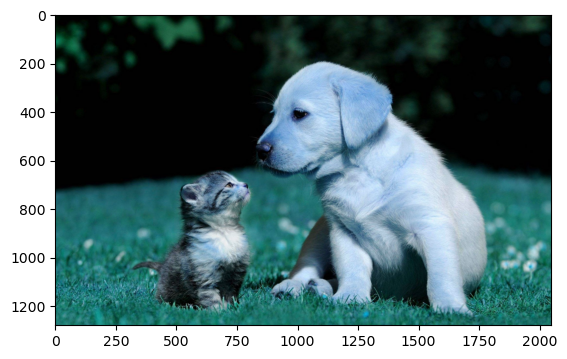

In [283]:
## Read an image
img = cv2.imread('D:/DataScience/DeepLearning/TensorFlow_opencv_object_detection/cat-dog.jpg')
plt.imshow(img) ## bgr

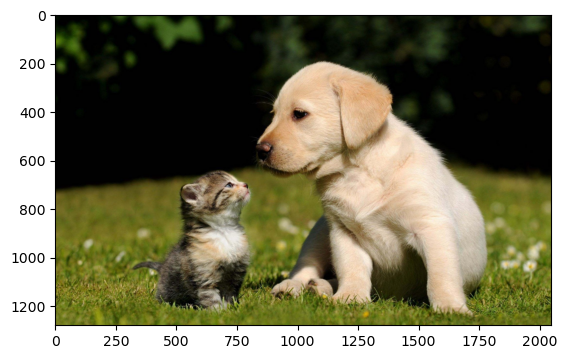

In [284]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [321]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)  ## 255/2
model.setInputMean((127.5, 127.5, 127.5)) # Mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000154D3EEA4B0>

In [286]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [287]:
print(classIndex.flatten())

[18 17]


In [288]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classIdx, conf, boxes in zip(classIndex, confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLables[classIdx-2], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3) 

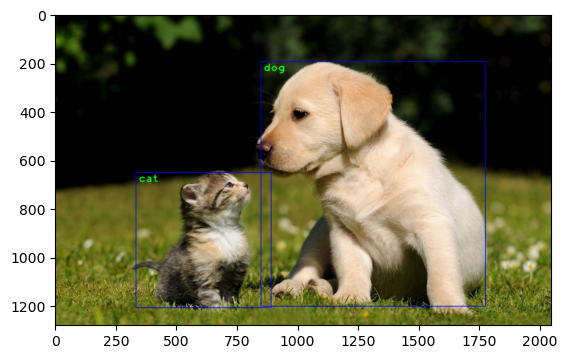

In [290]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [293]:
## Video Demo

In [332]:
cap = cv2.VideoCapture('D:/DataScience/DeepLearning/TensorFlow_opencv_object_detection/3195812-uhd_3840_2160_25fps.mp4')
#cap = cv2.VideoCapture()
# Check if video is opened correctly or not
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open video')

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = cap.read()
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    print(classIndex)
    if (len(classIndex) != 0):
        for classIdx, conf, boxes in zip(classIndex, confidence, bbox):
            if (classIdx<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLables[classIdx-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3) 
    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cap.destroyAllWindows()

[ 1 33  1]
[ 1 33  1]
[ 1 33]
[ 1 33]
[ 1 33]
[ 1 33]
[ 1 33]
[ 1 33]
[ 1 33]
[ 1 33]
[ 1 33]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[ 1 62]
[ 1 33  1]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62  1]
[ 1 62  1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[ 1 31]
[ 1 31 62]
[1]
[ 1 62]
[ 1 62]
[ 1 62  1]
[ 1 62  1]
[ 1  1 62]
[ 1 62  1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 33]
[ 1 33]
[1]
[ 1 62 33]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 14]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 14]
[1]
[1]
[1]
[1]
[ 1 14 77]
[1]
[ 1 77  1]
[ 1 77  1]
[ 1  1 77]
[ 1  1 77 77]
[ 1  1 77 77 77]
[ 1  1 77 77]
[ 1  1 77]
[ 1  1 77]
[ 1  1 77]
[ 1  1 77]
[ 1  1 77]
[ 1  1 77]
[ 1  1 77]
[1 1 1]
[ 1  1 77]
[ 1  1  1 77]
[ 1  1  1 77]
[ 1  1  1  1 77]
[1 1 1]
[ 1  1  1 77]
[ 1  1  1 77]
[ 1  1  1 77  1]
[ 1  1  1 77  1 10]
[ 1  1 77  1 77]

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
